# RTED-TDS Co-Sim

NPCC Case

In [1]:
%run -i 'cosim_import.py'

0.post4568.dev0+g9ddeca7
2.8.0


In [2]:
# if save the data to CSV
save_data = False
file_beging = 'cosim_'
sim_name = 'npcc_fict'

# case parameters
case_name = 'npcc'
caseH = 18  # start time [H] of the co-simulation
ict = True
ecc = False
agc = True

# Change ``rru``, ``rrd``, ``rsfr``, ``t_total`` for necessary.
t_total = 3600

rru, rrd, rsfr = 1.0, 1.0, 0.05

In [3]:
%run -i 'cosim_setup_andes.py'

EV1: ts=18[H], 10000 EVs, Total Q=87.7 MWh
Online 2925, Q=73.03 MWh, SoC=0.7421
Power(MW): Pt=-7.9463, Pc=-7.9463, Pd=0.0
Ctrl: 0=1584; 1=1341; 
EV1: Load A from Aest.csv.


Generating code for 1 models on 8 processes.


## Load synthetic

Create load data ``d_syn``, which is a ``DataFrame`` that have three columns: ``time``, ``s10``, ``h10``. ``time`` is by seconds, ``s10`` is scalar load.

ANDES total load is: 224.344 p.u.


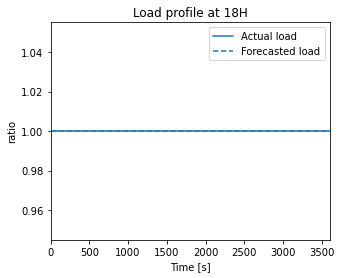

In [4]:
%run -i 'cosim_loadsyn.py'

## Setup ``ssp`` and ``ssd``

Convert ``ssa`` to pandapower net ``ssp``, add generator cost

The input cost array follow the matpower/pypower format, now only poly_cost is supported

In [5]:
%run -i 'cosim_setup_dispatch.py'

Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-08


RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=574931.335


## Loop

In the loop, there are mainly X parts:

- interval RTED: run DCOPF (``ssd.mdl``), run ACOPF(``ssp``), 

- interval AGC: do AGC, do dispatch with smooth setpoints

- interval PQ: alter load, run TDS(``ssa.TDS``)

Notes:

- The setpoints for DG are coded but not verified yet.

- After the development of ANDES control room, the dispatch and AGC part can be refactored.

- interface variables: ``DG.pmx``: DPV profile, ``DG.pref0``: setpoints, ``DG.pext0``: AGC

- ACOPF in pandapower considered generator limtis of ramping and SFR reserve

Loop

In [6]:
%run -i 'cosim_main.py'

  0%|                                                     | 0/3600 [00:00<?, ?it/s]RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED is solved.
RTED: total cost=574923.608
  0%|                                             | 8/3600 [00:03<27:02,  2.21it/s]


ValueError: TDS error! Exit with 1, end at 8s.

In [7]:
ssa.exit_code

1

(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

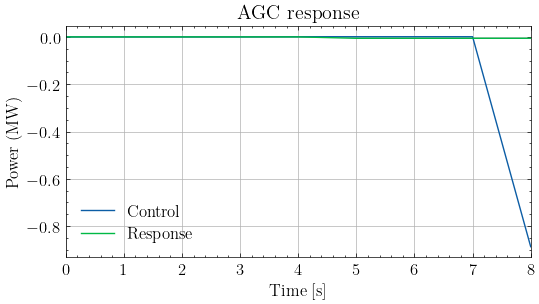

In [10]:
sse.ict()
sse.plot_agc(style='science')

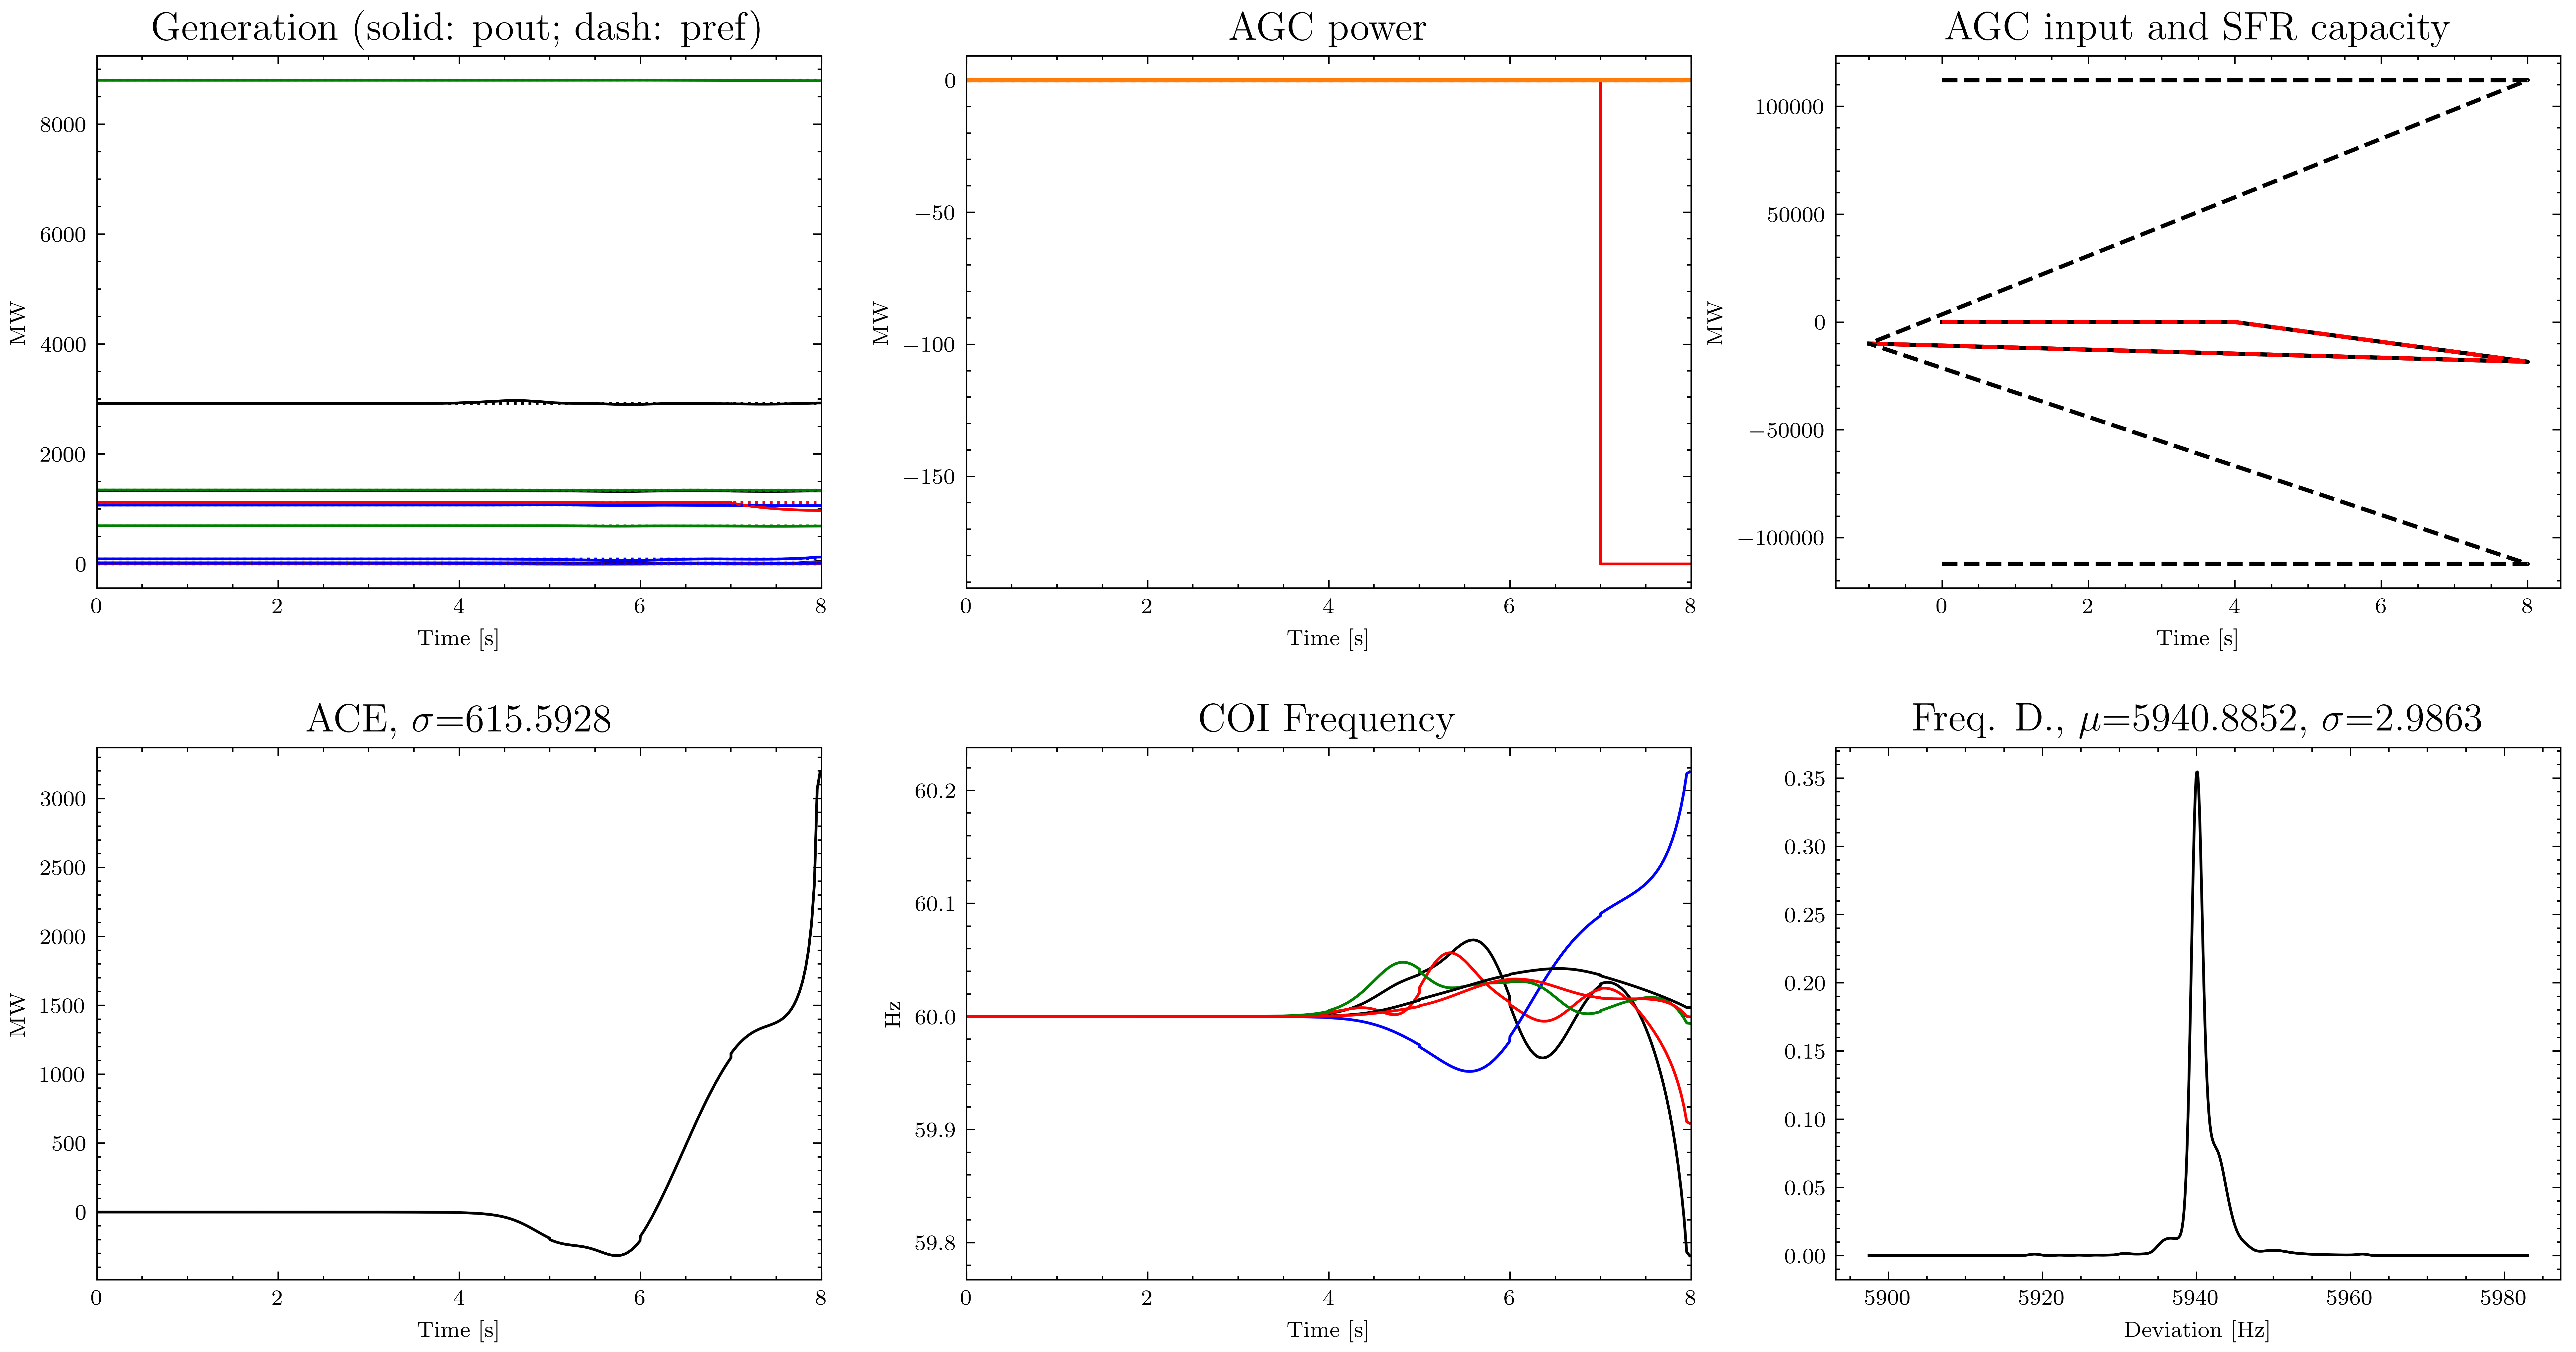

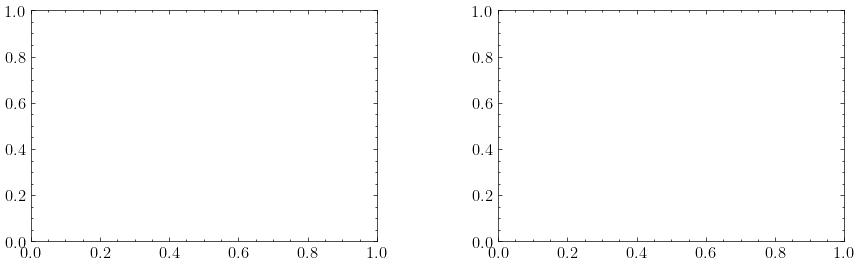

In [11]:
%run -i 'cosim_plot.py'

In [12]:
%run -i 'cosim_savedata.py'